<a href="https://colab.research.google.com/github/prapti-jain/Driver-s-License-Qualification-Prediction-using-KNN/blob/main/MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINI PROJECT (WEEK-1 & WEEK-2)


---




STUDENT NAME : *PRAPTI JAIN*

ENROLLMENT NO : *992401030348*

BATCH : *F-7*

DATASET USED : *Driver's License Test Scores Dat*

SOURCE : *Kaggle*

---



# 1. Dataset Selection:

In [ ]:
import matplotlib.pyplot as plt
import numpy as py
import pandas as pd
# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from google.colab import drive
drive.mount('/content/drive')
# mounting the drive for importing files

from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
License= pd.read_csv("/content/drive/MyDrive/prapti/DriversLicense.csv",
                     delimiter = ',')

# retrieving dataset using pandas
# the dataset is of classification type
# Categorical Target Variable:The column Qualified (values like "Yes" and "No").
# more than five valid input features.
# (eg) Speed Control, Night Drive, Steer Control, Mirror Usage, Confidence etc

# 2. Data Exploration (EDA):

In [ ]:
License.isnull().sum()
# Identifies that there are 150 missing values in training column

,0
Applicant ID,0
Gender,0
Age Group,0
Race,0
Training,150
Signals,0
Yield,0
Speed Control,0
Night Drive,0
Road Signs,0


In [ ]:
License
# shows the data contained in the dataset

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AID0496,Male,Middle Age,Other,Basic,49.10,54.83,51.93,42.94,64.52,52.17,47.79,45.01,59.57,78.32,Average,No
496,AID0497,Male,Young Adult,White,Basic,50.68,42.22,34.65,40.90,67.46,56.48,63.35,48.32,45.02,71.93,Average,No
497,AID0498,Female,Young Adult,Black,NaN,33.43,70.27,34.38,35.79,35.28,44.86,31.18,31.09,37.32,86.10,Fast,No
498,AID0499,Male,Middle Age,Black,Basic,50.07,51.41,64.32,60.77,40.68,57.59,49.60,62.72,36.53,85.48,Average,No


In [ ]:
License.duplicated().sum()
# shows there are no duplicate rows in the dataset

np.int64(0)

Now there are two ways to deal with the missing value of 'Training'
it can be seen that the training column has 2 prominent entries
- basic training
- advanced training

so, we can impute by mode method(the most frequent entry out of these 2)
and handel the missing values
however, “missing” might actually mean something (e.g., they didn’t attend training), so we keep it as a separate category, the reasons can be :
- Self-Taught Driving : Some people learn informally with a family member
- Unrecorded/Unofficial Training : They may have taken lessons, but the training wasn't officially documented
- Testing without Training : In some places, individuals can attempt a license test without mandatory formal training

Therefore I decided to add a “Missing” Category



- Training is categorical

- There are 150 missing values out of 500 rows (that's 30% missing)
- Adding the category "Missing"

In [ ]:
License['Training'].fillna('Missing', inplace=True)
# Adding the category "Missing" to deal with missing entries

/tmp/ipython-input-162-3136022540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  License['Training'].fillna('Missing', inplace=True)


In [ ]:
License.shape
# shows that dataset has 500 rows (entries) and 17 rows

(500, 17)

In [ ]:
License.head(10)
# more than five valid input features.
# (eg) Speed Control, Night Drive, Steer Control, Mirror Usage, Confidence,
# ,Parking, Theory Test etc.

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,Missing,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,Missing,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,Missing,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,Missing,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes
5,AID0006,Female,Young Adult,Other,Basic,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,Average,Yes
6,AID0007,Male,Middle Age,Black,Basic,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,Average,Yes
7,AID0008,Male,Young Adult,Other,Basic,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,Average,Yes
8,AID0009,Male,Young Adult,Other,Missing,35.59,41.80,45.71,32.72,10.09,34.31,27.35,36.64,31.94,64.57,Slow,No
9,AID0010,Female,Teenager,White,Advanced,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,Average,Yes


In [ ]:
License.dtypes
# shows datatypes of each column
# 7 columns with object dtype
# 10 columns with numerical(float) dtype

,0
Applicant ID,object
Gender,object
Age Group,object
Race,object
Training,object
Signals,float64
Yield,float64
Speed Control,float64
Night Drive,float64
Road Signs,float64


In [ ]:
License.tail(10)
# shows the last 10 rows

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
490,AID0491,Female,Young Adult,Other,Basic,70.85,61.87,42.04,50.43,60.08,55.54,49.64,57.07,52.98,76.16,Fast,No
491,AID0492,Male,Young Adult,White,Missing,2.53,31.16,64.13,41.04,36.79,41.81,14.78,38.49,11.62,51.07,Average,No
492,AID0493,Male,Middle Age,White,Advanced,48.75,56.99,67.35,72.83,77.59,60.87,31.99,70.64,65.45,56.39,Average,Yes
493,AID0494,Female,Young Adult,Black,Missing,15.74,53.88,30.73,54.10,55.92,37.67,40.42,32.72,38.08,64.54,Slow,No
494,AID0495,Male,Young Adult,White,Advanced,50.90,59.18,72.26,78.27,26.76,46.48,46.69,65.32,74.06,81.95,Average,No
495,AID0496,Male,Middle Age,Other,Basic,49.10,54.83,51.93,42.94,64.52,52.17,47.79,45.01,59.57,78.32,Average,No
496,AID0497,Male,Young Adult,White,Basic,50.68,42.22,34.65,40.90,67.46,56.48,63.35,48.32,45.02,71.93,Average,No
497,AID0498,Female,Young Adult,Black,Missing,33.43,70.27,34.38,35.79,35.28,44.86,31.18,31.09,37.32,86.10,Fast,No
498,AID0499,Male,Middle Age,Black,Basic,50.07,51.41,64.32,60.77,40.68,57.59,49.60,62.72,36.53,85.48,Average,No
499,AID0500,Female,Young Adult,Black,Basic,47.38,67.98,44.90,47.17,44.44,52.28,55.87,54.50,53.95,77.07,Average,No


In [ ]:
License.describe()
# computes count,mean,max,min of numerical attributes
# mean of almost all numericals attributes is the same expect Theory Test(70.62)
# min=0 also shows people have been given 0 marks also under certain attributes
# this data shows strong similarities among the columns(except Theory Test)

,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48.525460,47.784000,47.931740,47.877760,47.793440,47.429480,48.157580,47.654440,48.452360,70.623380
std,16.294927,16.062178,15.601242,15.302693,16.042885,15.580004,15.459866,16.056021,15.705702,17.864177
min,0.770000,0.000000,0.000000,1.740000,0.000000,0.000000,0.000000,5.120000,0.000000,40.100000
25%,38.097500,36.915000,37.297500,37.387500,36.547500,37.340000,38.355000,37.020000,37.460000,54.920000
50%,48.415000,48.950000,49.405000,48.160000,49.310000,48.220000,48.360000,48.255000,49.400000,69.855000
75%,59.357500,58.977500,58.392500,58.792500,58.772500,57.515000,58.795000,59.027500,59.262500,86.685000
max,95.610000,94.410000,89.430000,89.930000,88.870000,89.240000,90.770000,90.280000,88.360000,99.750000


In [ ]:
License['Age Group'].value_counts().sort_index()
# the age group of "young adults" have the highest applications for a DL
# Followed by middle age people and then teenagers

,count
Age Group,
Middle Age,147
Teenager,112
Young Adult,241


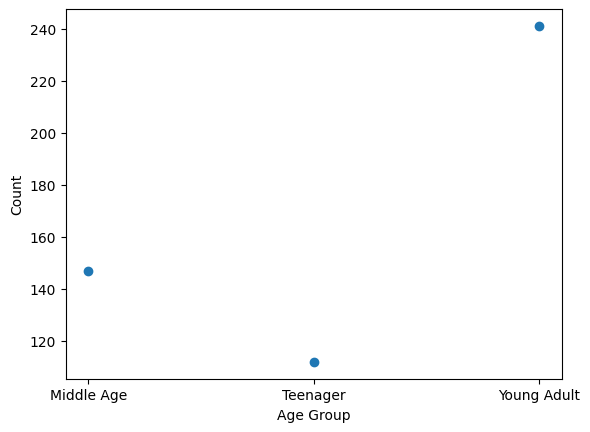

In [ ]:

age_group_counts = License['Age Group'].value_counts().sort_index()
plt.scatter(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
# confirms the above findings

License distribution by gender:
Qualified   No  Yes
Gender             
Female     131  125
Male       120  124


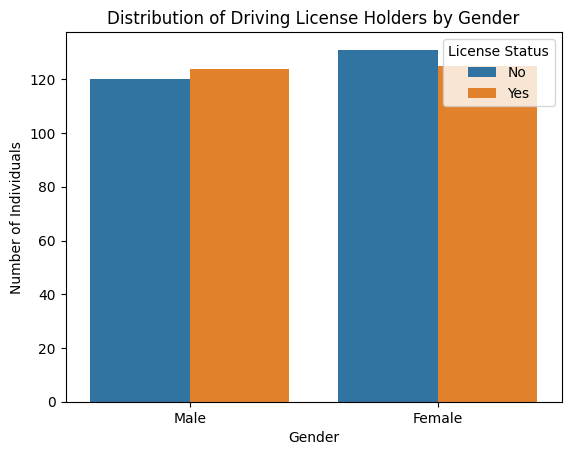

In [ ]:
license_gender_count = License.groupby(['Gender', 'Qualified']).size().unstack()

print("License distribution by gender:")
print(license_gender_count)
import seaborn as sns

sns.countplot(data=License, x='Gender', hue='Qualified')
plt.title('Distribution of Driving License Holders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.legend(title='License Status')

plt.show()
# shows the License distribution by gender
# shows almost equal number of male and female participation
# also there is not much difference in no. of qualifications by gender
# Which indicates that gender does not play a very crucial role in prediction

Training Completion Counts:
Training
Basic       198
Advanced    152
Missing     150
Name: count, dtype: int64

Training Completion Percentage:
Training
Basic       39.6
Advanced    30.4
Missing     30.0
Name: proportion, dtype: float64


/tmp/ipython-input-171-3610828154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Training', data=License, palette='pastel')


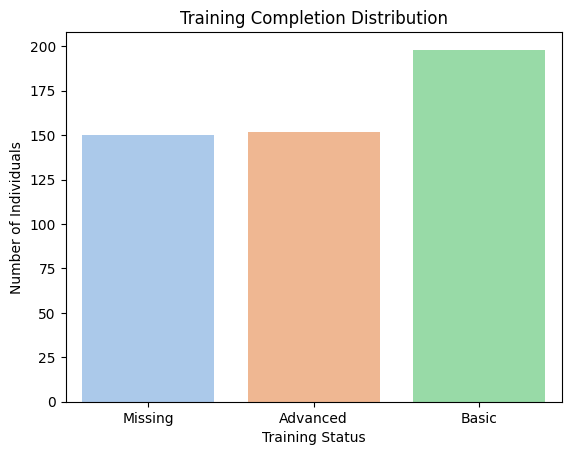

In [ ]:

training_counts =License['Training'].value_counts(dropna=False)
training_percent = License['Training'].value_counts(normalize=True,
                                                    dropna=False) * 100

print("Training Completion Counts:")
print(training_counts)
print("\nTraining Completion Percentage:")
print(training_percent.round(2))


sns.countplot(x='Training', data=License, palette='pastel')
plt.title('Training Completion Distribution')
plt.xlabel('Training Status')
plt.ylabel('Number of Individuals')

plt.show()
 # shows that applicants with 'Basic Training' are highest in number(175-200)
 # applicants with 'Advanced Training' , 'Missing Training' almost same (150)

Qualified Status by Training Category:
Qualified   No  Yes
Training           
Advanced    18  134
Basic       85  113
Missing    148    2


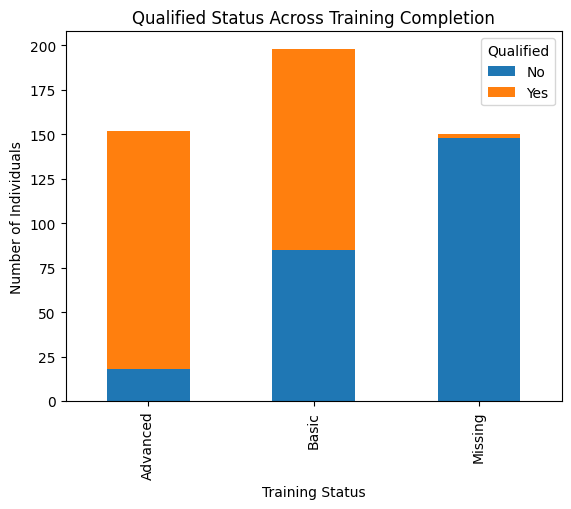

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab to count Qualified status within each Training category
training_qualified_ct = pd.crosstab(License['Training'], License['Qualified']
                                    , dropna=False)

print("Qualified Status by Training Category:")
print(training_qualified_ct)

# Plot stacked bar chart
training_qualified_ct.plot(kind='bar', stacked=True)

plt.title('Qualified Status Across Training Completion')
plt.xlabel('Training Status')
plt.ylabel('Number of Individuals')
plt.legend(title='Qualified')

plt.show()

# people with advanced training have the highest qualification rate(88%)
# people with basic training have a lower chance(57%)
# However with missing training , there is only 1.33% chance (extremly low)


Qualified Status by Race Category:
Qualified  No  Yes
Race              
Black      82   82
Other      84   87
White      85   80


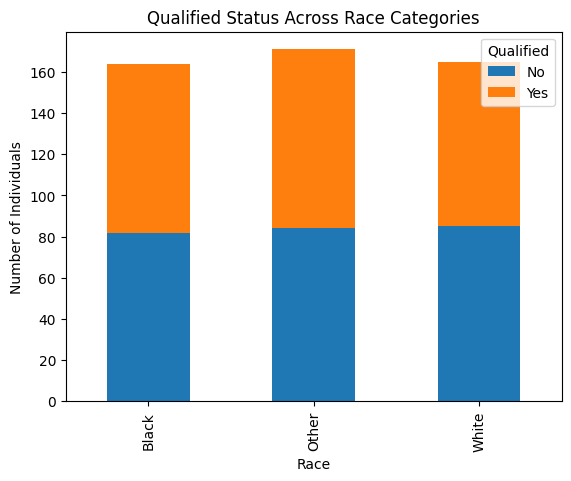

In [ ]:

# Crosstab to count Qualified status within each Race category
race_qualified_ct = pd.crosstab(License['Race'], License['Qualified'],
                                dropna=False)

print("Qualified Status by Race Category:")
print(race_qualified_ct)

# Plot stacked bar chart
race_qualified_ct.plot(kind='bar', stacked=True)

plt.title('Qualified Status Across Race Categories')
plt.xlabel('Race')
plt.ylabel('Number of Individuals')
plt.legend(title='Qualified')

plt.show()
# this shows that almost 50-50 people from each race qualified
# this shows that Race is redundant in determining qualification for a DL

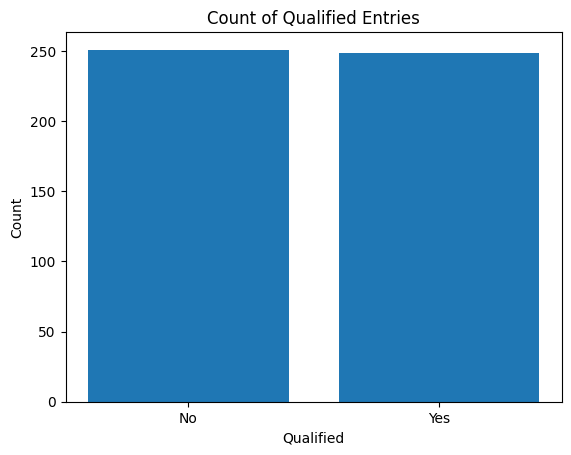

In [ ]:
qualified_counts = License['Qualified'].value_counts()
plt.bar(qualified_counts.index, qualified_counts.values)
plt.xlabel('Qualified')
plt.ylabel('Count')
plt.title('Count of Qualified Entries')
plt.show()
# The chances of Qualification is almost 50-50

/tmp/ipython-input-175-936463952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=License, x='Qualified', palette='Set2')


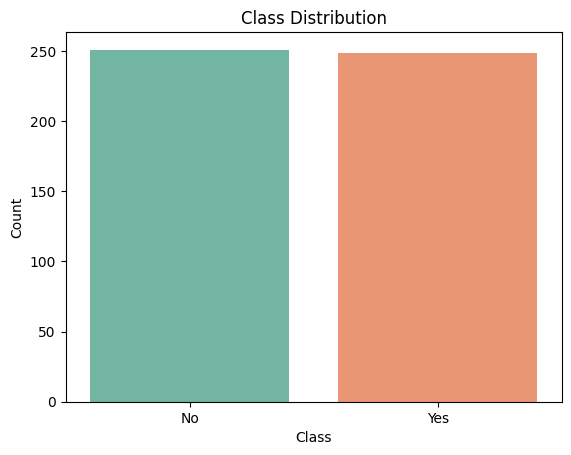

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing class distribution
sns.countplot(data=License, x='Qualified', palette='Set2')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# This shows that classes are perfectly balanced
# The model won’t be biased towards one class


# 3. Data Visualization Techniques:

/tmp/ipython-input-176-428815760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['ConfidenceGroup', 'Qualified']).size().unstack().plot.bar()


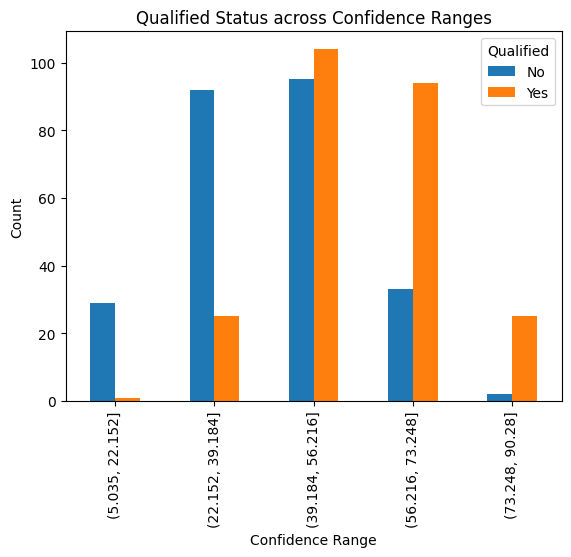

In [ ]:
# Creating binned ranges for Confidence
License['ConfidenceGroup'] = pd.cut(License['Confidence'], bins=5)

# Now grouping by binned Confidence and Qualified
License.groupby(['ConfidenceGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Confidence Range')
plt.ylabel('Count')
plt.title('Qualified Status across Confidence Ranges')

plt.show()

# shows that with less confidence chances of qualification also decrease
# as the confidence parameter increases qualification rate increases
# confidence range from(40-90) have the highest qualifiers

/tmp/ipython-input-177-1559512530.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(License['Steer Control'],showfliers=True,labels=['Steer Control'])


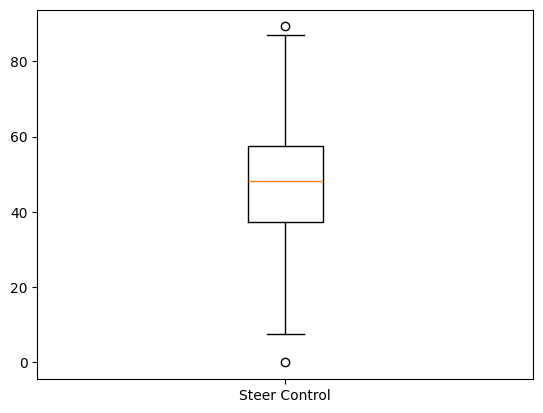

In [ ]:
plt.boxplot(License['Steer Control'],showfliers=True,labels=['Steer Control'])
plt.show();
# Outlier detected in steer control with 0 values and values > 80

/tmp/ipython-input-178-3319480184.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['SteerControlGroup', 'Qualified']).size().unstack().plot.bar()


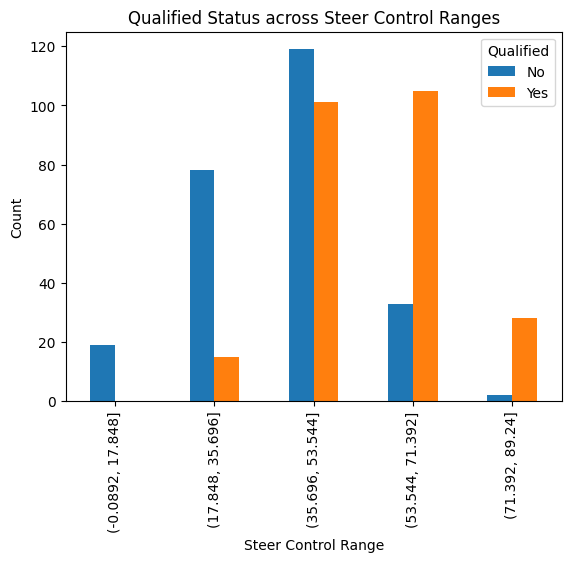

In [ ]:
# Creating binned ranges for Steer Control
License['SteerControlGroup'] = pd.cut(License['Steer Control'], bins=5)

# Now grouping by binned Steer Control and Qualified
License.groupby(['SteerControlGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Steer Control Range')
plt.ylabel('Count')
plt.title('Qualified Status across Steer Control Ranges')

plt.show()
# shows that with less steer control chances of qualification also decrease
# as the steer control parameter increases qualification rate increases
# steer control range from(50-90) have the highest qualifiers


/tmp/ipython-input-179-3455642598.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(License['Theory Test'],showfliers=True,labels=['Theory Test'])


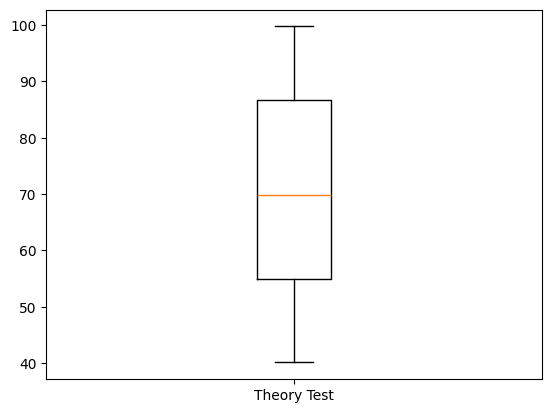

In [ ]:
plt.boxplot(License['Theory Test'],showfliers=True,labels=['Theory Test'])
plt.show();
# marks in theory test range from 40-100
# no outlier detected

/tmp/ipython-input-180-3007144715.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['TheoryTestGroup', 'Qualified']).size().unstack().plot.bar()


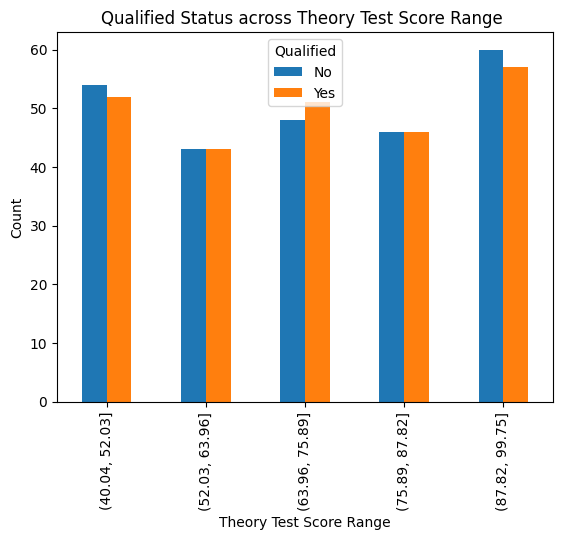

In [ ]:
# Create binned ranges for Theory Test
License['TheoryTestGroup'] = pd.cut(License['Theory Test'], bins=5)

# Now grouping by binned Theory test scores and Qualified
License.groupby(['TheoryTestGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Theory Test Score Range')
plt.ylabel('Count')
plt.title('Qualified Status across Theory Test Score Range ')

plt.show()

# this shows that the theory test score range is not a perfect indication
# as for each theory score range the number of qualifications is similar
# from which it can be concluded that practical parameters dominate the result
# The theory test score is mandatory to attempt but treated as obsolete

/tmp/ipython-input-181-1275063682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=License, x='Theory Test', y='Qualified', palette='Set1')


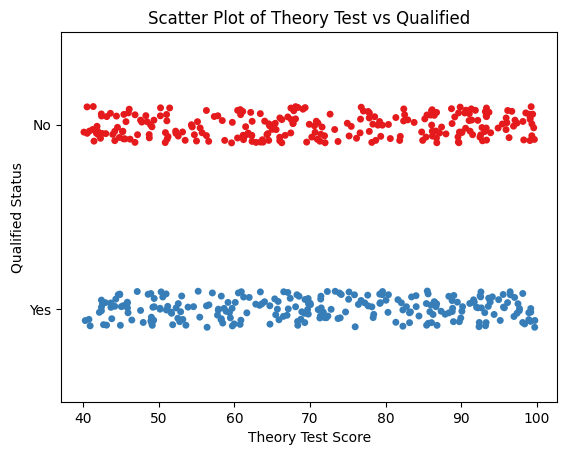

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.stripplot(data=License, x='Theory Test', y='Qualified', palette='Set1')

plt.xlabel('Theory Test Score')
plt.ylabel('Qualified Status')
plt.title('Scatter Plot of Theory Test vs Qualified')

plt.show()
# confirms the above findings

/tmp/ipython-input-182-962742245.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['SpeedControlGroup', 'Qualified']).size().unstack().plot.bar()


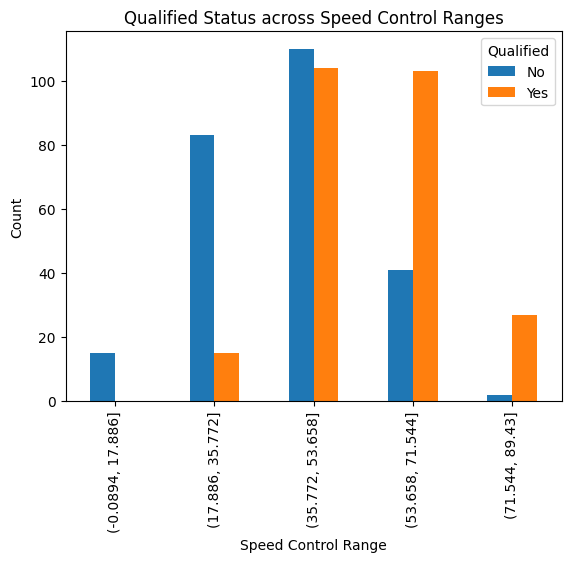

In [ ]:
# Creating binned ranges for Speed Control
License['SpeedControlGroup'] = pd.cut(License['Speed Control'], bins=5)

# Now grouping by binned Speed Control and Qualified
License.groupby(['SpeedControlGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Speed Control Range')
plt.ylabel('Count')
plt.title('Qualified Status across Speed Control Ranges')

plt.show()
# shows that with less speed control chances of qualification also decrease
# as the speed control parameter increases qualification rate increases
# speed control range from(50-90) have the highest qualifiers

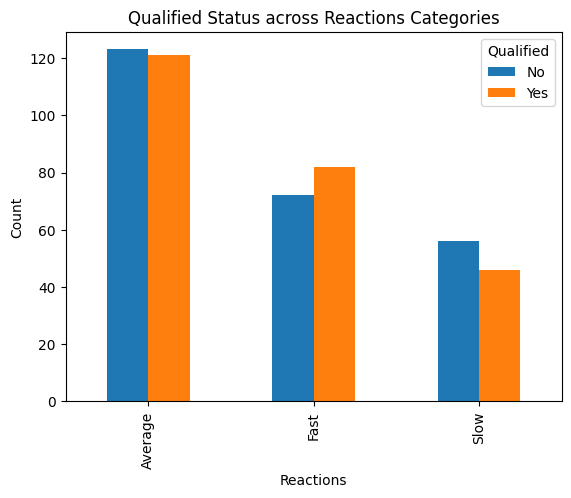

In [ ]:
License.groupby(['Reactions', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Reactions')
plt.ylabel('Count')
plt.title('Qualified Status across Reactions Categories')

plt.show()
# shows that most applicants' response to driving scenarios is average
# with faster reaction qualification chances increase
# with slower reaction qualification chances decrease

Qualified Status by Reaction Category:
Qualified   No  Yes
Reactions          
Average    123  121
Fast        72   82
Slow        56   46


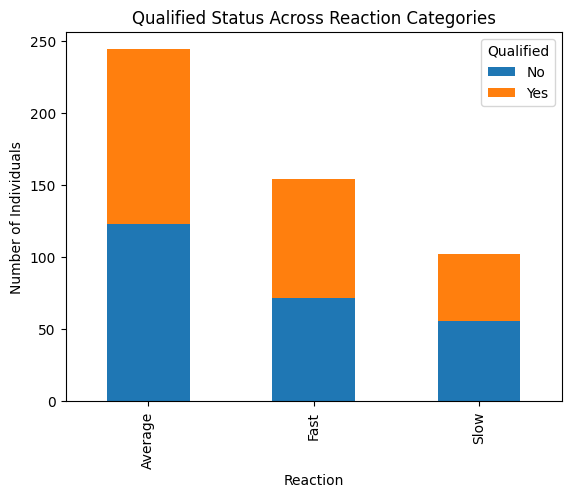

In [ ]:
# Crosstab to count Qualified status within each Reaction category
reaction_qualified_ct = pd.crosstab(License['Reactions'], License['Qualified']
                                    , dropna=False)

print("Qualified Status by Reaction Category:")
print(reaction_qualified_ct)

# Plot stacked bar chart
reaction_qualified_ct.plot(kind='bar', stacked=True)

plt.title('Qualified Status Across Reaction Categories')
plt.xlabel('Reaction')
plt.ylabel('Number of Individuals')
plt.legend(title='Qualified')

plt.show()
# Although faster reaction makes qualification likely, chances are still 50-50
# which makes this a parameter , not too helpful in prediction

/tmp/ipython-input-185-3286074870.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['SignalsGroup', 'Qualified']).size().unstack().plot.bar(


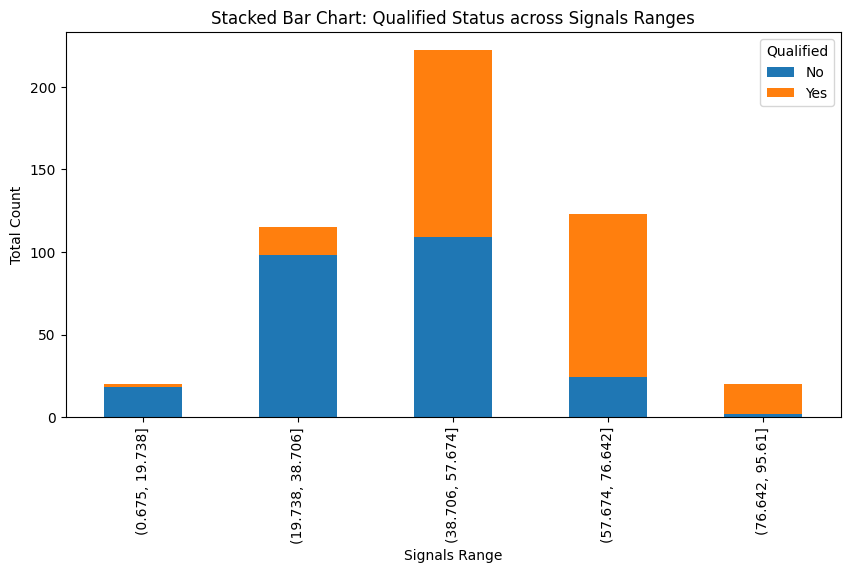

In [ ]:
import matplotlib.pyplot as plt

# Bin the 'Signals' feature into 5 equal-width intervals
License['SignalsGroup'] = pd.cut(License['Signals'], bins=5)

# Group by binned 'SignalsGroup' and 'Qualified', then plot
License.groupby(['SignalsGroup', 'Qualified']).size().unstack().plot.bar(
    stacked=True, figsize=(10, 5)
)

plt.xlabel('Signals Range')
plt.ylabel('Total Count')
plt.title('Stacked Bar Chart: Qualified Status across Signals Ranges')

plt.show()

plt.show()
# shows that with less signal knowledge chances of qualification also decrease
# as signal knowledge increases qualification rate increases
# signal knowledge range from(40-90) have the highest qualifiers


/tmp/ipython-input-186-299588325.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['RoadSignsGroup', 'Qualified']).size().unstack().plot.bar(


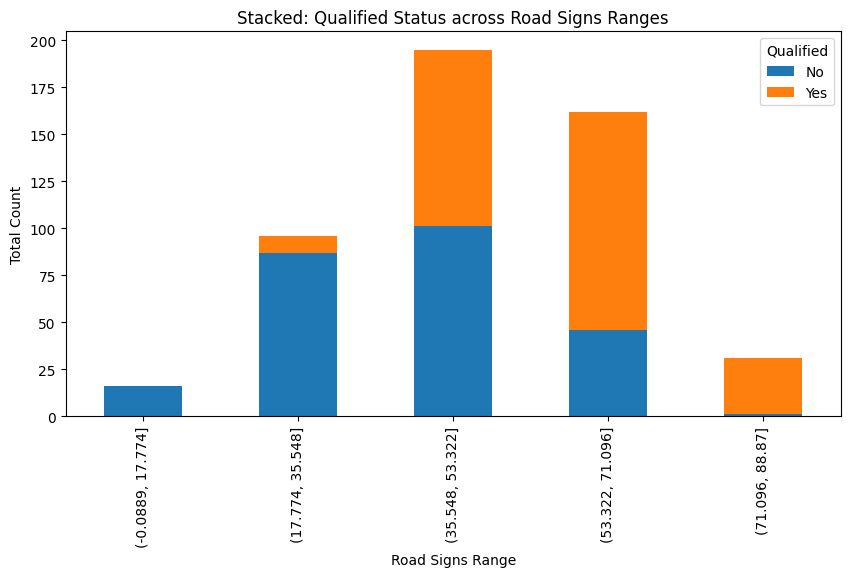

In [ ]:

License['RoadSignsGroup'] = pd.cut(License['Road Signs'], bins=5)

License.groupby(['RoadSignsGroup', 'Qualified']).size().unstack().plot.bar(
    stacked=True, figsize=(10, 5))

plt.xlabel('Road Signs Range')
plt.ylabel('Total Count')
plt.title('Stacked: Qualified Status across Road Signs Ranges')

plt.show()
# shows that with less road sign knowledge chances of qualification decrease
# as road sign knowledge increases qualification rate increases
# road sign knowledge range from(35-90) have the highest qualifiers


/tmp/ipython-input-187-602993825.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['ParkingGroup', 'Qualified']).size().unstack().plot.bar()


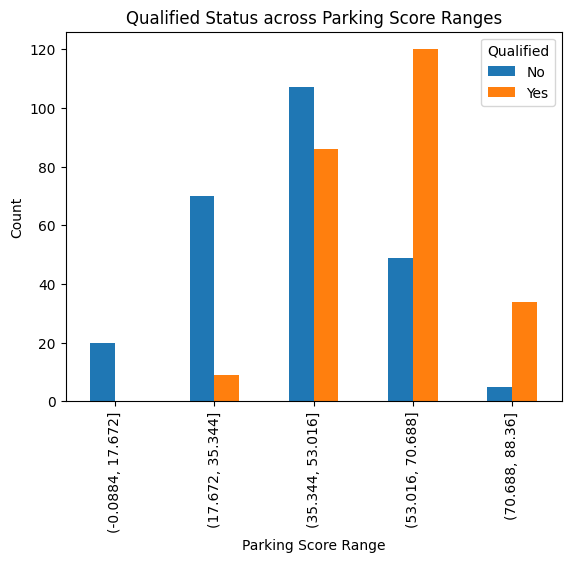

In [ ]:
# Create binned ranges for Parking
License['ParkingGroup'] = pd.cut(License['Parking'], bins=5)

# Now group by binned Parking and Qualified
License.groupby(['ParkingGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Parking Score Range')
plt.ylabel('Count')
plt.title('Qualified Status across Parking Score Ranges')

plt.show()
# shows that with less parking experience chances of qualification also decrease
# as the parking experience parameter increases qualification rate increases
# parking control range from(50-70) have the highest qualifiers


/tmp/ipython-input-188-1869864002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['MirrorGroup', 'Qualified']).size().unstack().plot.bar()


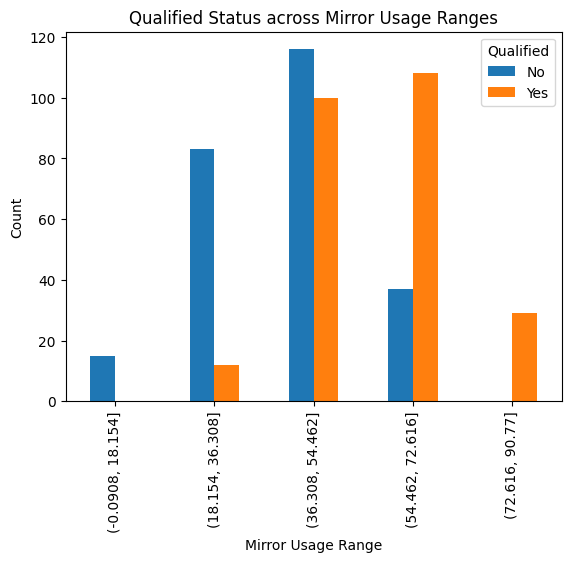

In [ ]:
# Create binned ranges for Mirror Usage
License['MirrorGroup'] = pd.cut(License['Mirror Usage'], bins=5)

# Now group by binned Mirror Usage and Qualified
License.groupby(['MirrorGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Mirror Usage Range')
plt.ylabel('Count')
plt.title('Qualified Status across Mirror Usage Ranges')

plt.show()
# shows that with less mirror usage chances of qualification also decrease
# as the mirror usage parameter increases qualification rate increases
# mirror usage range from(50-70) have the highest qualifiers


/tmp/ipython-input-189-3889357944.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['YieldGroup', 'Qualified']).size().unstack().plot.bar()


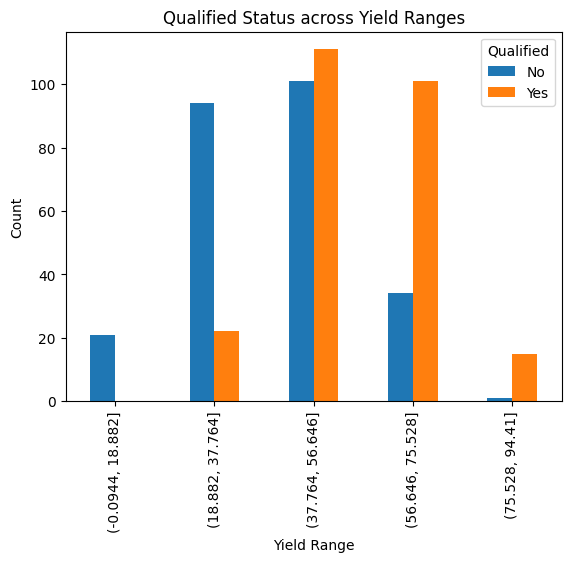

In [ ]:
# Create binned ranges for Yield
License['YieldGroup'] = pd.cut(License['Yield'], bins=5)

# Now group by binned Yield and Qualified
License.groupby(['YieldGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Yield Range')
plt.ylabel('Count')
plt.title('Qualified Status across Yield Ranges')

plt.show()

# shows that with less yield chances of qualification also decrease
# as the yield parameter increases qualification rate increases
# mirror usage range from(37-70) have the highest qualifiers


/tmp/ipython-input-190-3437520669.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  License.groupby(['NightDriveGroup', 'Qualified']).size().unstack().plot.bar()


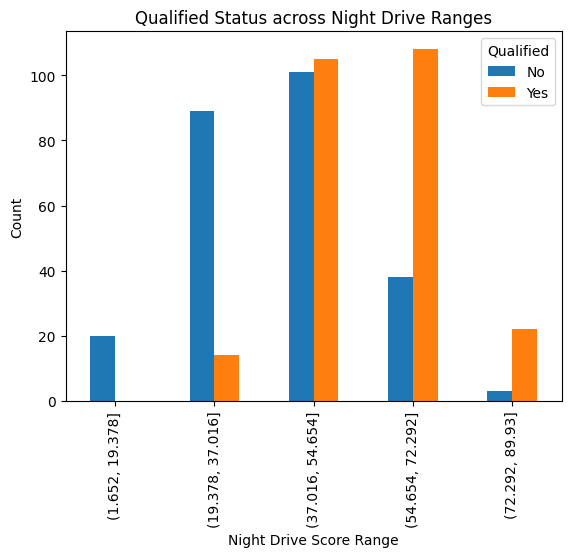

In [ ]:
# Create binned ranges for Night Drive
License['NightDriveGroup'] = pd.cut(License['Night Drive'], bins=5)

# Group by binned Night Drive and Qualified
License.groupby(['NightDriveGroup', 'Qualified']).size().unstack().plot.bar()

plt.xlabel('Night Drive Score Range')
plt.ylabel('Count')
plt.title('Qualified Status across Night Drive Ranges')

plt.show()
# shows that with lower night driving skills chances of qualification decrease
# as the night driving skills increases qualification rate increases
# night driving skills range from(37-70) have the highest qualifiers


Parameter Score Ranges and Their Impact on Driving License Qualification (Out of 100)

- 40–90
(Confidence, Signals, Yield Judgment, Night Driving)

- 50–90
(Steer Control, Speed Control, Parking, Mirror Usage)

- 35–90
(Road Signs)

→ Candidates scoring within this range show moderate to high performance. Qualification chances are generally good if scores are on the higher end of this range.


The following columns are obsolete in determining whether a person gets a driving license :

- Gender
- Race
- Theory Test


categorical columns that plays a crucial role :

- training type

In [ ]:
License.corr(numeric_only=True)

,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test
Signals,1.000000,0.471961,0.425305,0.456283,0.479917,0.446266,0.462067,0.495820,0.445910,0.020956
Yield,0.471961,1.000000,0.415499,0.509137,0.473974,0.652434,0.445232,0.453278,0.470095,-0.021392
Speed Control,0.425305,0.415499,1.000000,0.489146,0.430403,0.471289,0.466457,0.442625,0.420466,0.047029
Night Drive,0.456283,0.509137,0.489146,1.000000,0.481805,0.521518,0.512007,0.493468,0.516216,0.032918
Road Signs,0.479917,0.473974,0.430403,0.481805,1.000000,0.499105,0.470436,0.493219,0.511909,0.061578
Steer Control,0.446266,0.652434,0.471289,0.521518,0.499105,1.000000,0.659260,0.470039,0.510876,0.020651
Mirror Usage,0.462067,0.445232,0.466457,0.512007,0.470436,0.659260,1.000000,0.495669,0.516415,0.035524
Confidence,0.495820,0.453278,0.442625,0.493468,0.493219,0.470039,0.495669,1.000000,0.505146,0.076073
Parking,0.445910,0.470095,0.420466,0.516216,0.511909,0.510876,0.516415,0.505146,1.000000,-0.000004
Theory Test,0.020956,-0.021392,0.047029,0.032918,0.061578,0.020651,0.035524,0.076073,-0.000004,1.000000


<Axes: >

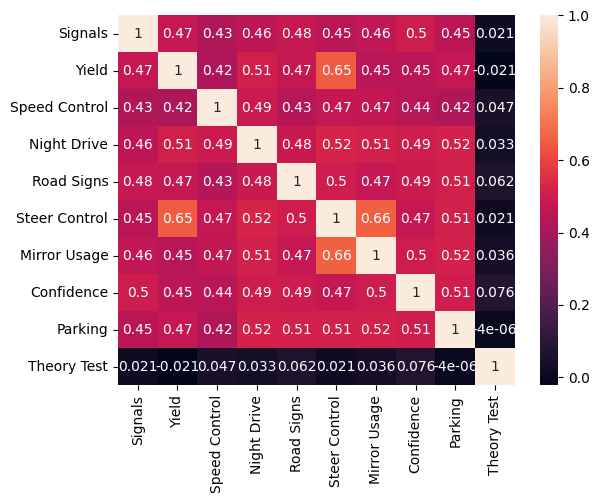

In [ ]:
sns.heatmap(License.select_dtypes(include='number').corr(), annot=True)

FINDINGS :
- The theory test does not have a strong relation with any of the other numerical attributes
- There is strong corelation betweeen :


1.   Yield and steer control
2.   Mirror usage and steer control



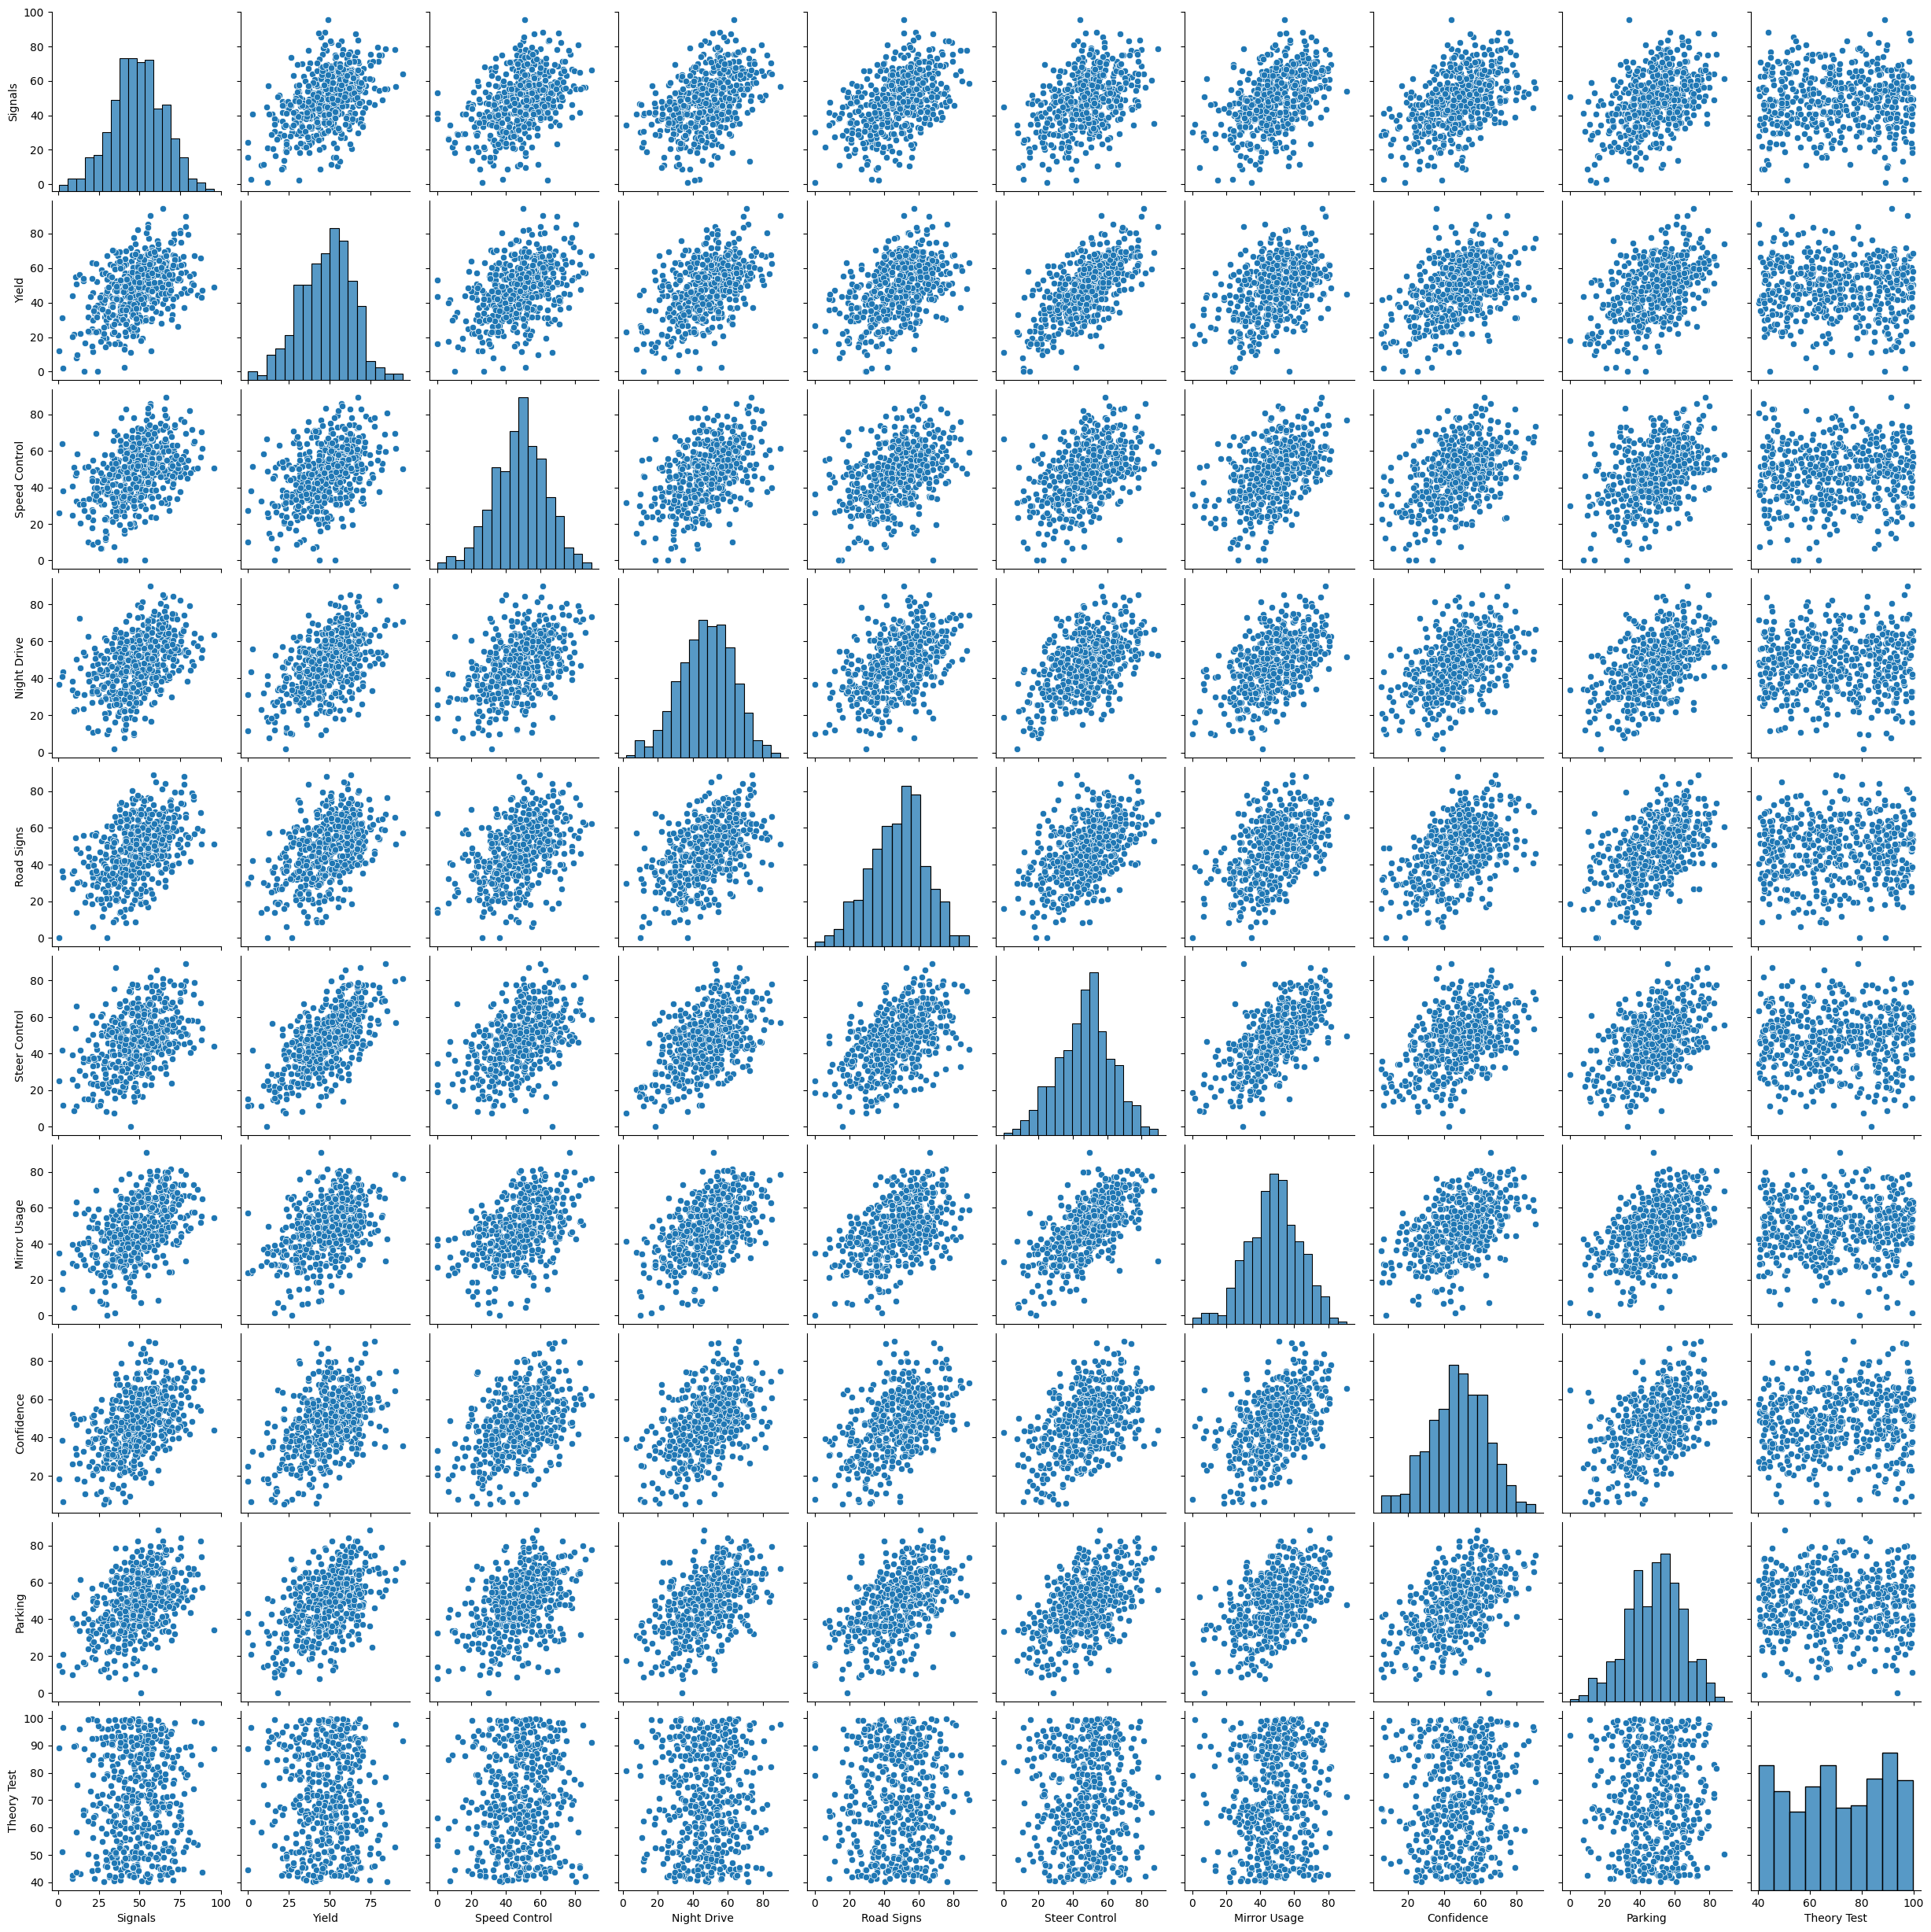

In [ ]:
sns.pairplot(License)

# 4. Feature Correlation & Selection

Checking wether the distribution is normal or not using shapiro-wilk test to determine Pearson/Spearman which corelation will be used

In [ ]:
from scipy.stats import shapiro


for col in License.select_dtypes(include='number').columns:
    stat, p = shapiro(License[col].dropna())  # Drop missing values
    print(f"{col}: p-value = {p}")
    if p > 0.05:
        print(" Looks normal\n")
    else:
        print(" Not normal\n")
# checks every numerical attribute and tells wether it has normal distribution

Signals: p-value = 0.8075655679305165
 Looks normal

Yield: p-value = 0.07974975044976383
 Looks normal

Speed Control: p-value = 0.08039581130513995
 Looks normal

Night Drive: p-value = 0.37939249199075203
 Looks normal

Road Signs: p-value = 0.0710961817467512
 Looks normal

Steer Control: p-value = 0.2188375159494645
 Looks normal

Mirror Usage: p-value = 0.06731767769178874
 Looks normal

Confidence: p-value = 0.2502821854154253
 Looks normal

Parking: p-value = 0.04681424059071351
 Not normal

Theory Test: p-value = 1.2113504796354694e-12
 Not normal



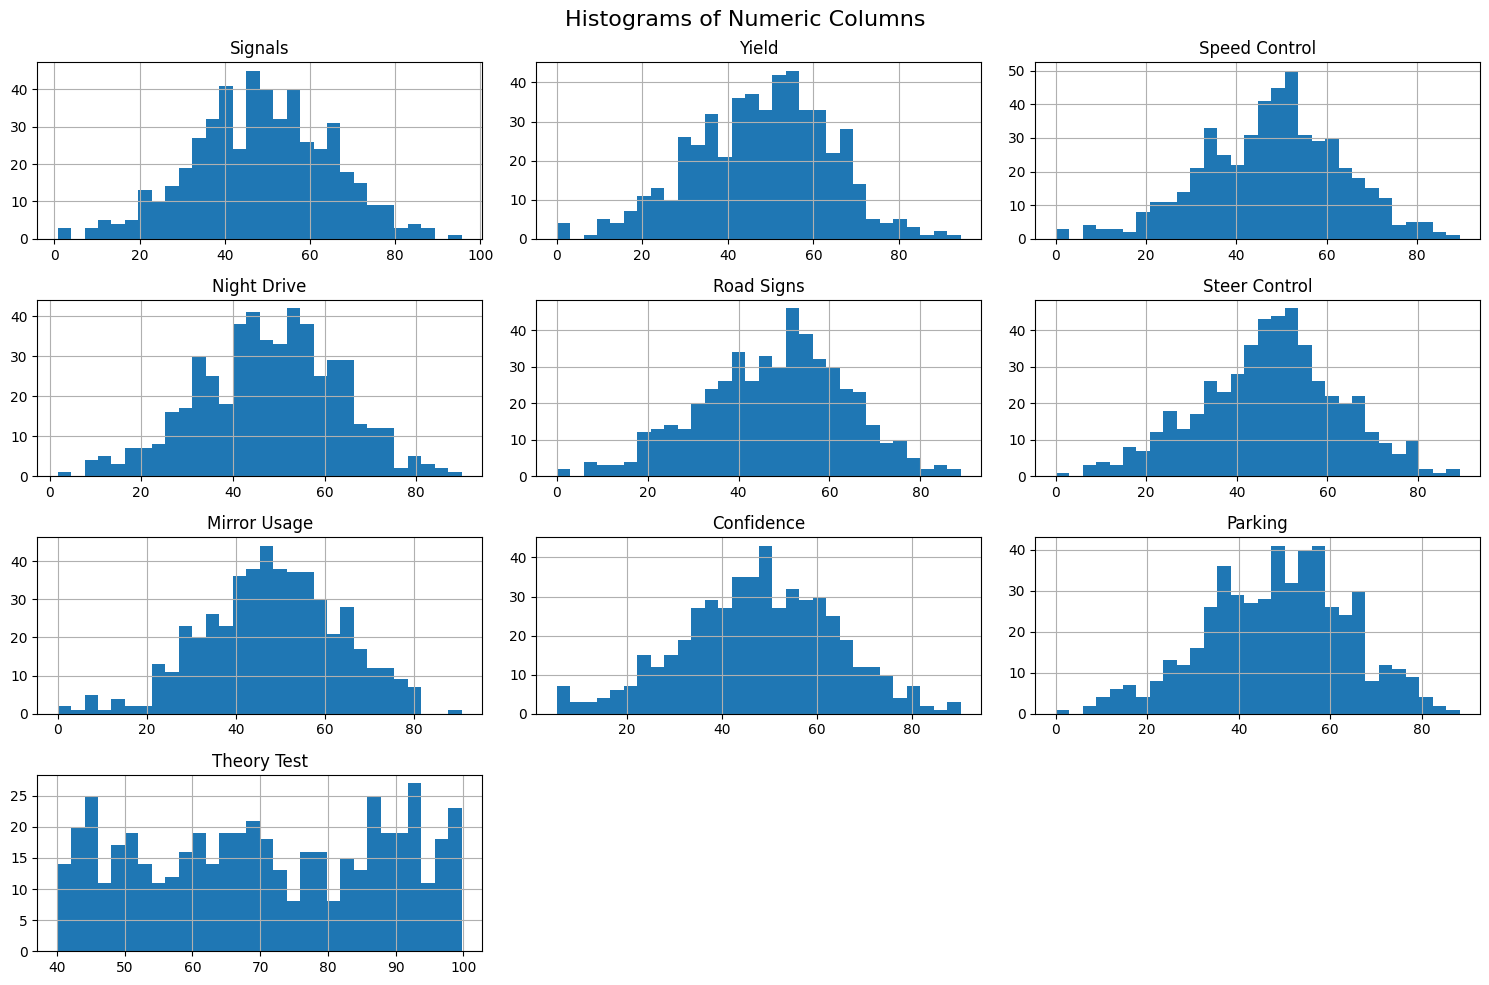

In [ ]:
import matplotlib.pyplot as plt

License.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()
# checking through visualization (for bell shaped curves )
# other than parking and theory test all others are of normal distribution


# Hence choosing Pearson corelation method

In [ ]:
# Convert 'Yes' to 1 and 'No' to 0
License['Qualified'] = License['Qualified'].map({'Yes': 1, 'No': 0})



In [ ]:
numeric_data = License.select_dtypes(include='number')

cor_with_target = numeric_data.corr(method='pearson')['Qualified'].sort_values(ascending=False)

print("Correlation of numeric features with 'Qualified':\n")
print(cor_with_target)


Correlation of numeric features with 'Qualified':

Qualified        1.000000
Mirror Usage     0.537057
Road Signs       0.536480
Parking          0.532956
Signals          0.526656
Steer Control    0.517628
Night Drive      0.513185
Confidence       0.511645
Yield            0.490447
Speed Control    0.476706
Theory Test      0.005877
Name: Qualified, dtype: float64


this shows Pearson correlation coefficients (r-values) for which :

r values range from -1-1

- -1<r<0    negative corelation
- 0<r<1     positive corelation
- -1=r      perfectly negative corelation
- 1=r       perfectly positive corelation
- 0=r       no corelation

This shows that :    
- there is no corelation of target with theory test
- there is positive corelation of targetwith others
- the above shows how strong the corelation is in descending order
- Mirror Usage  >  Road Signs  >  Parking  >Signals >  Steer Control   >  Night Drive      >  Confidence       >  Yield           >  Speed Control   >  Theory Test      

TOP RELEVANT FEATURES TO BE USED FOR MODELLING:

 Mirror Usage   ,  Road Signs ,   Parking  ,Signals , Steer Control   ,



Night Drive     ,Confidence       ,  Yield   , Speed Control   

# 5. Model Development Using KNN:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# as Training column is having object datatype, but to be included for training
# One-hot encode the 'Training' column (drop_first=True avoids dummy trap)
training_encoded = pd.get_dummies(License['Training'], prefix='Training',
                                  drop_first=True)

# Select numeric features and concatenate encoded 'Training'
x_values = pd.concat([
    License[['Mirror Usage', 'Road Signs', 'Signals','Parking',
             'Steer Control', 'Night Drive', 'Confidence','Yield'
             ,'Speed Control']],
    training_encoded
], axis=1)

# Define target variable
y_values = License['Qualified']  # y is dependent

# Split data into training and testing sets (65% - 35%)
x_train, x_test, y_train, y_test = train_test_split(
    x_values, y_values, test_size=0.35, random_state=10)


In [ ]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Performing feature scaling before fitting the model.

In [ ]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 31(taking only odd values).
# This will be the number of neighbours for the KNN classifier.
for ii in range(1,31,2):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)


[0.7485714285714286, 0.8, 0.8057142857142857, 0.8114285714285714, 0.8171428571428572, 0.8114285714285714, 0.8114285714285714, 0.8057142857142857, 0.8, 0.8057142857142857, 0.8, 0.8057142857142857, 0.8057142857142857, 0.8114285714285714, 0.8]


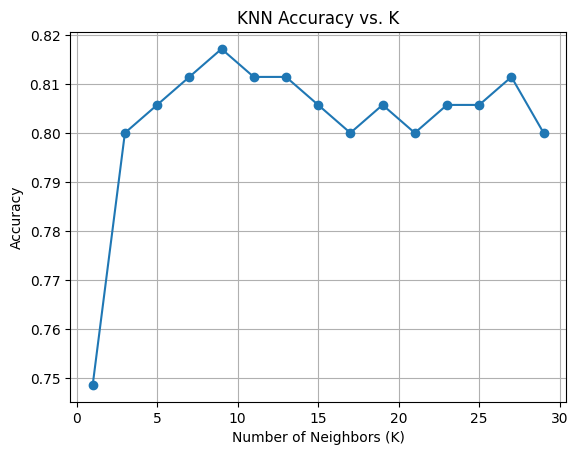

In [ ]:
plt.plot(num_neigh, accuracy, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K')
plt.grid(True)
plt.show()

The shape of the cruve:

first the accuracy is increasing , reach the top and then decrease to eventually become constant(almost a straight line)

Highest Accuracy at k=9 where accuracy = 0.811

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN = KNN.fit(x_train_scale,y_train)
# implementing the KNN model

In [ ]:
y_predict = KNN.predict(x_test_scale)

print(y_predict.dtype)

int64


# 6. Model Evaluation:

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_predict))

[[56 32]
 [ 0 87]]


Interpretation:

- True Positives (TP = 87): Correctly predicted as Qualified = Yes.

- True Negatives (TN = 56): Correctly predicted as Qualified = No.

- False Positives (FP = 32): Incorrectly predicted Qualified = Yes, but it was actually No.

- False Negatives (FN = 0): None — model didn't miss any actual Yes cases.

The model is very good at identifying “Qualified = Yes” — 87 correct, 0 missed.

However, it made 32 false positive errors, predicting some "No"s as "Yes".

This could mean some unqualified people are wrongly predicted as qualified.

<Axes: xlabel='Predicted', ylabel='Actual'>

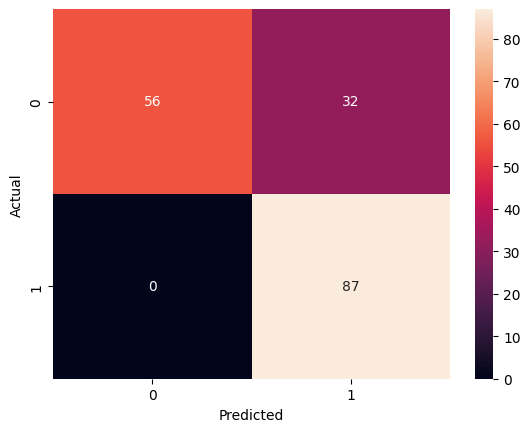

In [ ]:
import seaborn as sns
# Create new dataframe
df = pd.DataFrame()

# Create new columns within dataframe
df['Actual'] = y_test
df['Predicted'] = y_predict

#Using pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df.Actual,df.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.64      0.78        88
           1       0.73      1.00      0.84        87

    accuracy                           0.82       175
   macro avg       0.87      0.82      0.81       175
weighted avg       0.87      0.82      0.81       175



 this is the classification report, which summarizes model’s performance for both classes (0 = Not Qualified, 1 = Qualified):


class 0 (Not Qualified):

- Precision = 1.00 : All predictions labeled as “Not Qualified” were actually correct.

- Recall = 0.64 : The model caught only 64% of actual "Not Qualified" people. It missed 36%, predicting them as “Qualified.”

- F1-score = 0.78:  Balance of high precision but moderate recall.

Class 1 (Qualified):

- Precision = 0.73 : Of all people predicted as “Qualified,” 73% were actually qualified.

- Recall = 1.00 : all actual “Qualified” people were correctly identified — none missed.

- F1-score = 0.84 : Good balance with strong recall.

Overall Accuracy = 82%

82% of the total predictions were correct.

KEY FEATURES :

- Strength: Model is excellent at catching “Qualified” candidates (recall = 1.00).
- Weakness: It misses 36% of the “Not Qualified” candidates, which could be risky in real-life use (e.g., unqualified people being passed).

- High precision for “Not Qualified” class — when it predicts "No", it’s very confident and correct.

- Lower precision for “Qualified” — it wrongly includes some unqualified people as “Qualified”.



The model is biased toward qualifying people — it doesn't miss qualified candidates but does wrongly qualify some unqualified ones.